# Deep Learning para classificar imagens



In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

2024-04-27 18:11:42.311787: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-27 18:11:42.370637: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 18:11:42.643166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 18:11:42.643220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 18:11:42.692110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(len(imagens_treino))
print(imagens_treino.shape)
print(imagens_teste.shape)
print(len(identificacoes_teste))
print(identificacoes_treino.min())
print(identificacoes_treino.max())


60000
(60000, 28, 28)
(10000, 28, 28)
10000
0
9


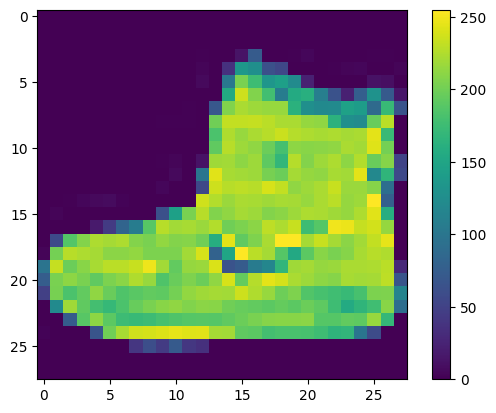

In [9]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

In [10]:
imagens_treino = imagens_treino/float(255)

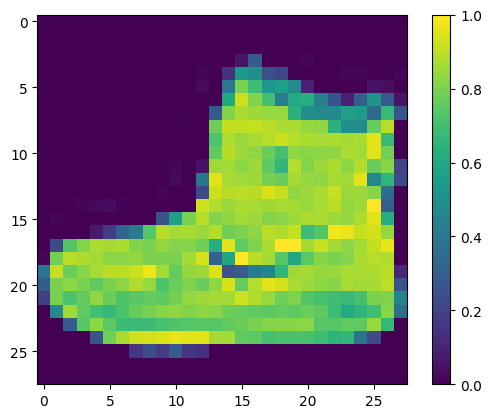

In [11]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [12]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

2024-04-27 18:16:12.607870: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-27 18:16:12.608436: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
100/100 [==============================] - 1s 6ms/step - loss: 0.7275 - accuracy: 0.7493 - val_loss: 0.4972 - val_accuracy: 0.8288
Epoch 2/5
 39/100 [==========>...................] - ETA: 0s - loss: 0.4911 - accuracy: 0.8306

/home/filipi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.8363 - val_loss: 0.4269 - val_accuracy: 0.8508
Epoch 3/5
100/100 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.8516 - val_loss: 0.4062 - val_accuracy: 0.8572
Epoch 4/5
100/100 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0.8618 - val_loss: 0.3916 - val_accuracy: 0.8608
Epoch 5/5
100/100 [==============================] - 1s 5ms/step - loss: 0.3684 - accuracy: 0.8708 - val_loss: 0.3631 - val_accuracy: 0.8702


In [13]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.02339305,  0.07261576,  0.04435549, ..., -0.05455919,
        -0.00829941,  0.09399103],
       [-0.05680638, -0.01213526,  0.01062202, ..., -0.01784638,
        -0.05052578,  0.08774529],
       [-0.00683788, -0.09565373,  0.04817474, ..., -0.05825805,
        -0.10303915,  0.05797732],
       ...,
       [-0.04320462, -0.06294844,  0.08828901, ..., -0.03997665,
         0.02076262, -0.00038733],
       [-0.05214686,  0.01965609,  0.02734154, ...,  0.12678002,
        -0.05377785, -0.00603627],
       [-0.06164305, -0.02994579,  0.05287935, ...,  0.09314793,
         0.04548719, -0.08156262]], dtype=float32)

In [18]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [19]:
print(pesos_camada_dense.shape)
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

(784, 256)


[array([[0.5604146 , 0.94877255, 0.47659314, ..., 0.85742396, 0.07172666,
         0.8742791 ],
        [0.01510298, 0.49583596, 0.22468908, ..., 0.12582016, 0.39485744,
         0.194131  ],
        [0.30041698, 0.24456519, 0.01394221, ..., 0.68794054, 0.38125178,
         0.26446283],
        ...,
        [0.19461565, 0.86937964, 0.8892908 , ..., 0.7341348 , 0.40686256,
         0.6493004 ],
        [0.48163092, 0.16857997, 0.42616108, ..., 0.9600166 , 0.10834891,
         0.6562232 ],
        [0.14374283, 0.2488387 , 0.16981173, ..., 0.03002804, 0.40032417,
         0.57139206]], dtype=float32),
 array([-7.79823586e-03, -3.26009765e-02,  1.07908629e-01, -8.63609836e-03,
         2.27186173e-01,  1.59127876e-01, -4.38374206e-02,  5.36928372e-03,
        -1.42165367e-02,  5.20135053e-02, -1.31217977e-02,  1.01667985e-01,
        -7.17746466e-02,  1.29254758e-01, -9.95533019e-02,  6.46279380e-02,
         8.05813894e-02,  1.37066664e-02, -8.73313937e-03, -7.49688130e-03,
         4.785

In [20]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 65.5623 - accuracy: 0.4140 - val_loss: 8.2192 - val_accuracy: 0.7436
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 17.0843 - accuracy: 0.6258 - val_loss: 6.4027 - val_accuracy: 0.7214
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 7.0277 - accuracy: 0.6772 - val_loss: 3.4982 - val_accuracy: 0.7198
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 3.4896 - accuracy: 0.7042 - val_loss: 2.1780 - val_accuracy: 0.7591
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0177 - accuracy: 0.7380 - val_loss: 1.0946 - val_accuracy: 0.8056


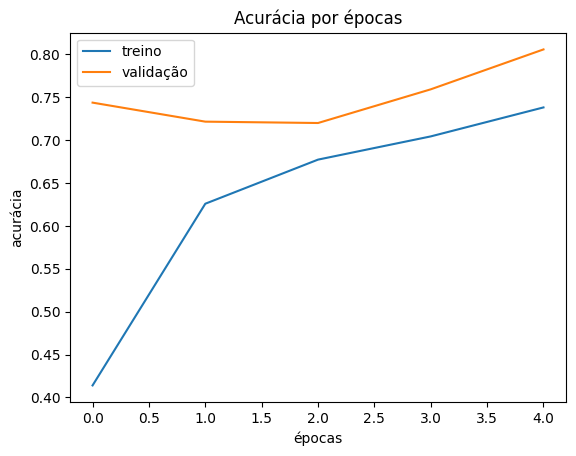

In [23]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


In [29]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

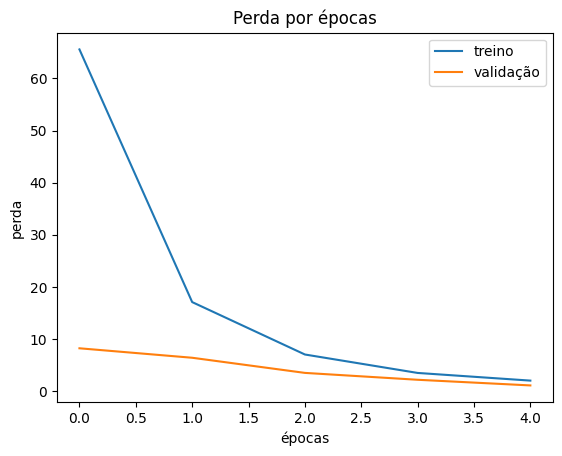

In [30]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [31]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [32]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [33]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/home/filipi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testando o modelo e o modelo salvo

In [77]:
i = 1

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[i]))
print('número da imagem de teste:', identificacoes_teste[i])



313/313 [==============================] - 0s 819us/step
resultado teste modelo salvo: 8
número da imagem de teste: 2
